 #  <b>Static data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

<h1> 1.1.1. Manipulation de dataset

<h3>a- importer et visualiser le contenu d'un dataset

In [10]:
from utils import load_data
data = load_data('./Data/Dataset1.csv')

In [11]:
data.iloc[0,0] 
data.head(10)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
5,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0
6,220,7.2,222,7.62,0.43,0.81,7.40,0.34,0.69,1.05,2.00,1.88,1.3932,0
7,207,7,401,7.63,0.59,0.69,7.60,0.32,0.68,0.62,2.43,1.68,1.1868,0
8,333,14.9,422,8.26,0.48,NaN,8.45,0.51,3.32,1.08,9.21,0.32,2.0124,2
9,289,8.6,560,7.58,0.44,0.67,7.30,0.63,0.66,0.94,2.43,1.79,1.1524,1


<h2>b-Fournir une description de chaque attribut

In [12]:
from utils import print_info
print_info(data)

{'Number of rows': 885,
 'Number of colonns': 14,
 'Memory size': '96.796875 ko',
 'Data type': ['int64', 'object', 'float64']}

<h2>c- fournir une description de chaque attribut

In [13]:
from utils import describe_column
colonnes_description = describe_column(data)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,N,885,int64
1,P,885,object
2,K,885,int64
3,pH,885,float64
4,EC,885,float64
5,OC,884,float64
6,S,885,float64
7,Zn,885,float64
8,Fe,885,float64
9,Cu,884,float64


<h1>1.1.2.Analyse des caractéristiques des attributs du dataset :

<h2>

<h2>a-Les mesures de tendance centrale 

In [14]:
from utils import central_trend,symetrie, quartile, missing_value
attributes = data.columns
central_trend_dict = {}

for attribute in attributes:
    ct_result = central_trend(data, attribute)
    
    
    # Create a dictionary for the current attribute's central trend
    tc = {
        'Median': ct_result['median'],
        'Mean': ct_result['mean'],
        'Modes': ct_result['modes'],
        
    }
    
    # Add additional measures 
    quartile_result = quartile(data[attribute])
    tc['First Quartile'] = quartile_result[1]
    tc['Third Quartile'] = quartile_result[3]
    
    tc['symetrie'] = symetrie(tc)
    
    #missing, result = missing_value(data[attribute])
    # tc['Missing Values'] = missing

    central_trend_dict[attribute] = tc

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(central_trend_dict, orient='index')



,Median,Mean,Modes,First Quartile,Third Quartile,symetrie
N,257.0000,246.997740,[207],"(Q1, 201)","(Q3, 307)",Distribution non identifie
P,8.1000,14.555266,[8.3],"(Q1, 4.8)","(Q3, 8.1)",Distribution non identifie
K,475.0000,501.338983,[444],"(Q1, 412)","(Q3, 581)",Distribution d'asymetrie positive
pH,7.5000,7.511955,[7.5],"(Q1, 7.35)","(Q3, 7.63)",Distribution symetrique
EC,0.5500,0.543921,"[0.53, 0.62]","(Q1, 0.43)","(Q3, 0.64)",Distribution symetrique
OC,0.5900,0.617817,[0.88],"(Q1, 0.38)","(Q3, 0.78)",Distribution symetrique
S,6.6400,7.545808,"[4.22, 5.13]","(Q1, 4.7)","(Q3, 8.75)",Distribution d'asymetrie positive
Zn,0.3600,0.468723,[0.28],"(Q1, 0.28)","(Q3, 0.47)",Distribution symetrique
Fe,3.5600,4.126757,[6.32],"(Q1, 2.05)","(Q3, 6.32)",Distribution non identifie
Cu,0.9300,0.952002,[1.25],"(Q1, 0.63)","(Q3, 1.25)",Distribution symetrique


<h2>b-Construction des boîtes à moustache et affichage des données aberrantes

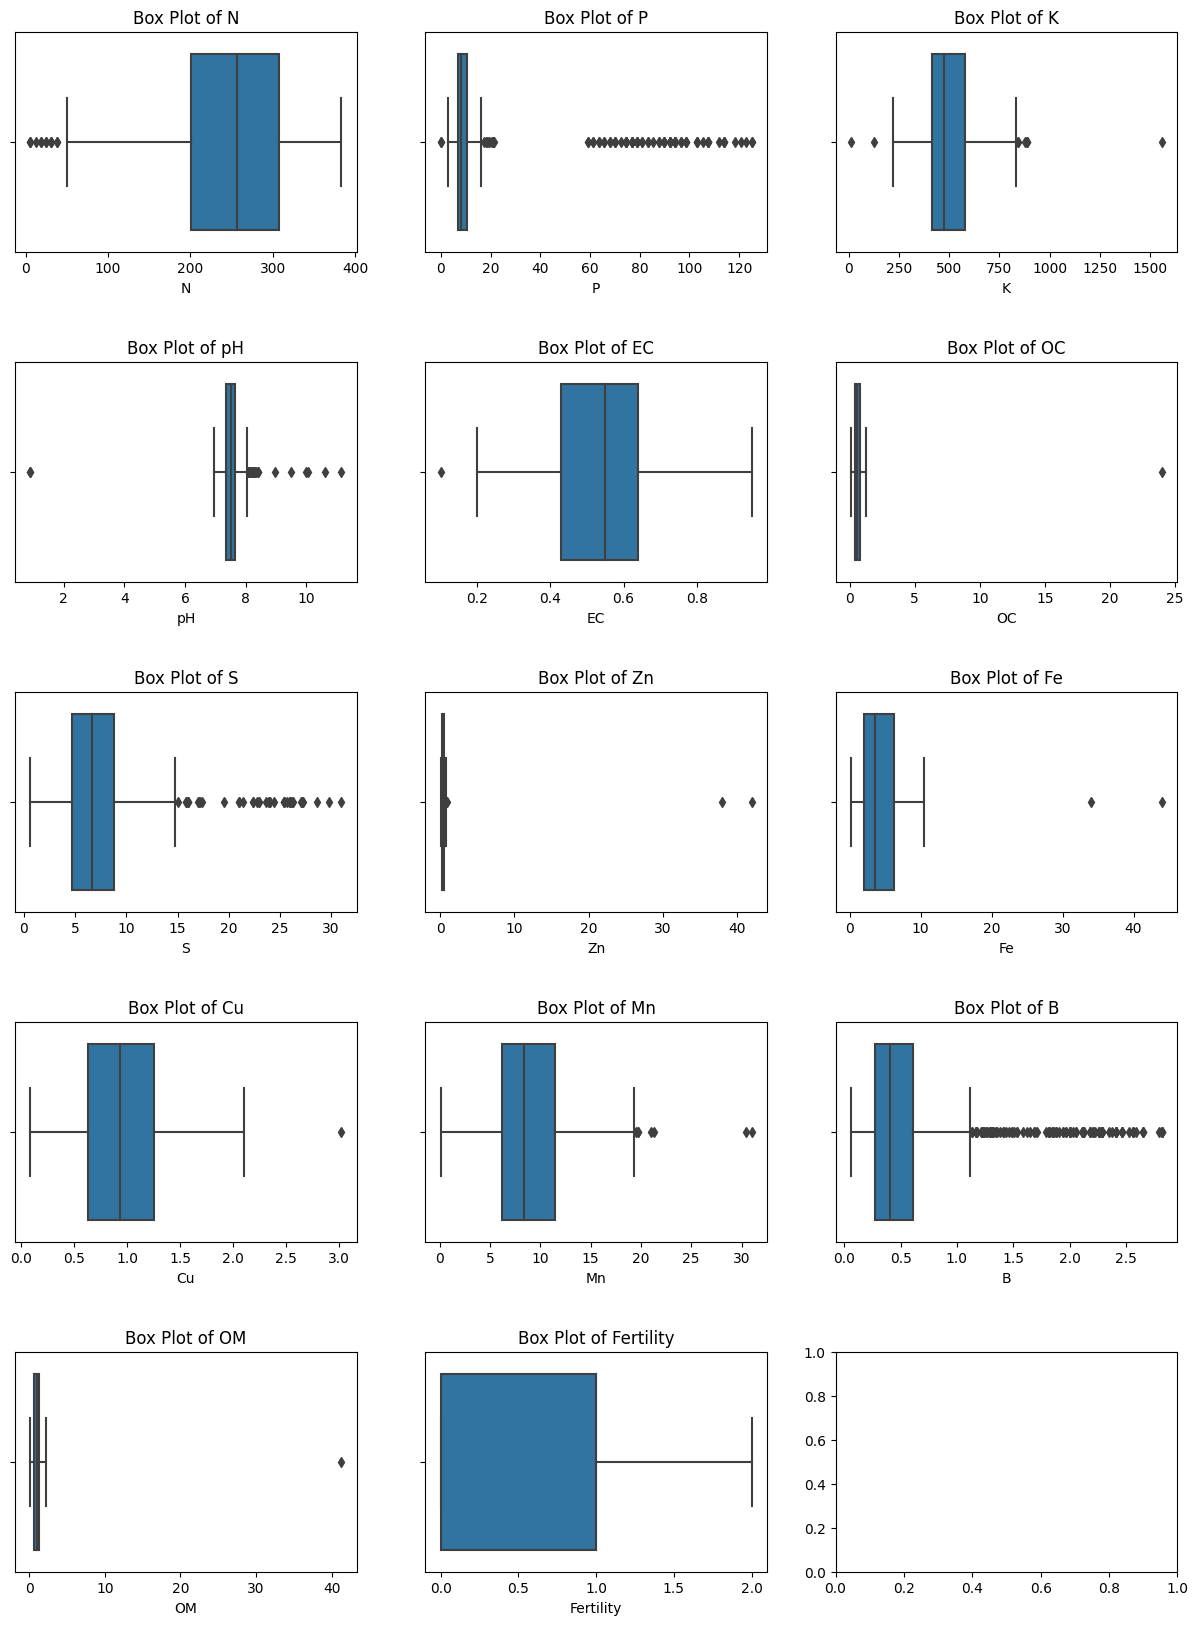

In [15]:
from utils import box_plot_sns
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

# Replace all '?' values with 0 in column 'P'
data['P'] = data['P'].replace('?', 0)

# Convert the column to numeric values
data['P'] = pd.to_numeric(data['P'], errors='coerce')

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)
    box_plot_sns(data, attribute, axes[row, col])

plt.show()

<h2>c-Construction des histogrammes 

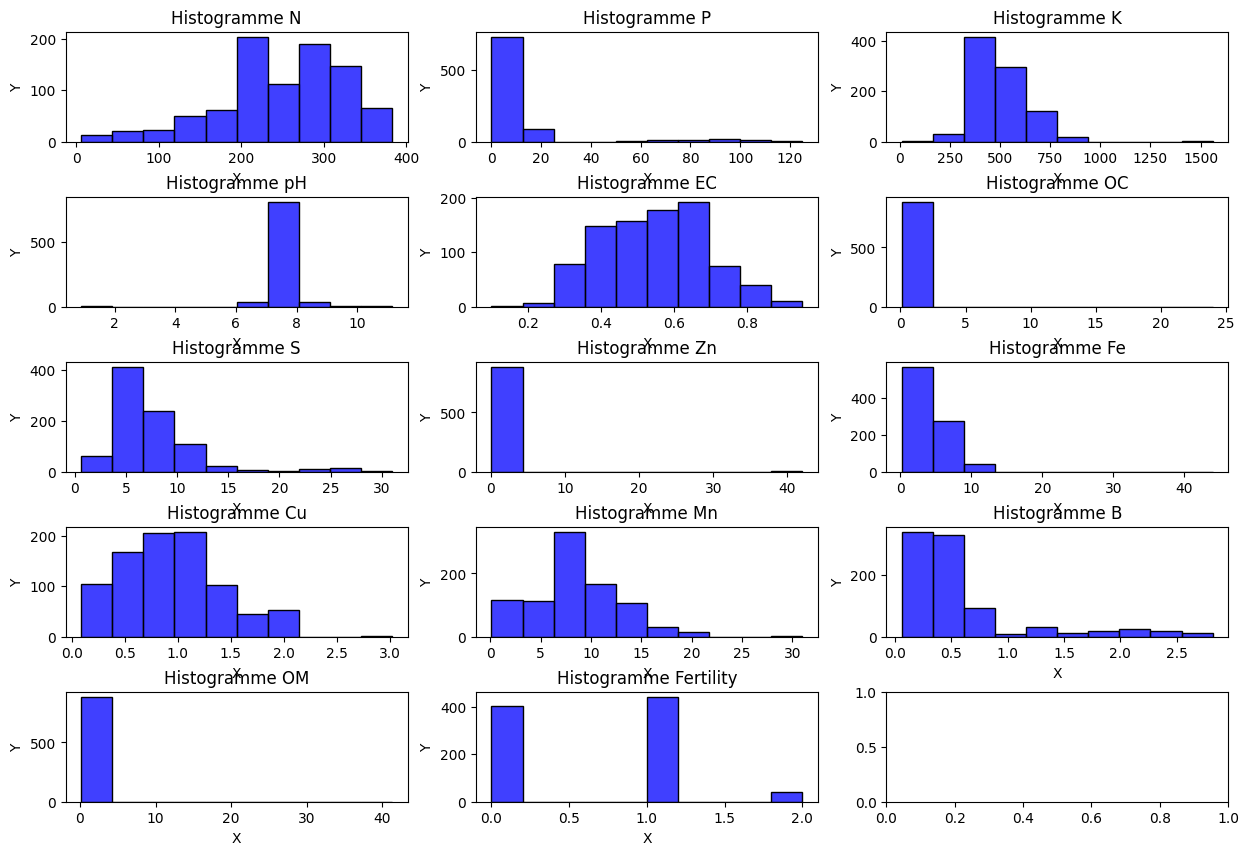

In [16]:
from utils import histogramme_sns

fig, axes = plt.subplots(5, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)
    histogramme_sns(data, attribute, axes[row, col])

plt.show()

<h2>d-Diagrammes de dispersion des données 